In [2]:
import pandas as pd     # To handle data
import numpy as np      # For number computation
import matplotlib.pyplot as plt  # For plots
from textblob import TextBlob     #for processing textual data
import re
import operator
import seaborn as sns   # For attractive plots
from wordcloud import WordCloud, STOPWORDS

In [3]:
data = pd.read_csv('tweetsdata_indianrailwayhastag.csv')

In [4]:
mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 198.97317844328396


In [5]:
fav_max = np.max(data['likes'])
rt_max = np.max(data['retweet'])
fav = data[data.likes == fav_max].index[0]
rt = data[data.retweet == rt_max].index[0]

In [6]:
# FAVOURITE TWEET:

display((data['tweet'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

'India Marching Ahead!\n\nTransformation of Railways. From paper listing to hand held terminals for TTE.\n#IndianRailways https://t.co/tFSKQXVnso'

Number of likes: 16959.0
141.0 characters.



In [7]:
# MAX RETWEETS:

display((data['tweet'][rt]))
display((rt_max))
display((data['len'][rt]))

'How beautiful are these #IndianRailways trains 🇮🇳🚂! \n\nWomen from #Bihar painted these coaches with traditional #Mithila art, also known as #Madhubani, using their fingers🖐🏾, twigs 🌿, matchsticks &amp; brushes 🖌️ with natural dyes &amp; pigments!\n \n#TuesdayMotivation https://t.co/KbQ8M6mO9b'

3136.0

290.0

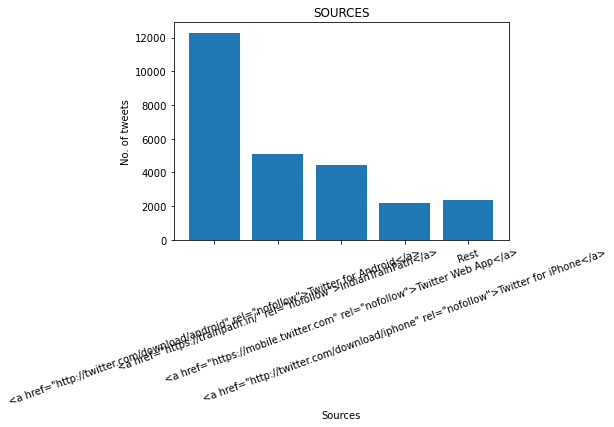

In [8]:
# LOOKED FOR CONTRIBUTION OF SOURCES:

source_counts = {}
for i in data['source']:
    if i in source_counts:
        source_counts[i] = source_counts[i] +1
    else:
        source_counts[i] = 1
sorted_x = sorted(source_counts.items(), key=operator.itemgetter(1), reverse = True)
clist = [x[1] for x in  sorted(source_counts.items(), key=operator.itemgetter(1), reverse = True)]
rest = sum(clist[5:])

# BAR CHART:

sorted_x = sorted_x[:4]
r = ('Rest', rest)
sorted_x.append(tuple(r))
a,b = map(list,zip(*sorted_x))
plt.figure()
plt.bar(range(len(a)), b, align = 'center')
plt.xticks(range(len(a)), a)
plt.xticks(rotation=20)
plt.xlabel('Sources')
plt.ylabel('No. of tweets')
plt.title('SOURCES')
_=plt.show()

<AxesSubplot:>

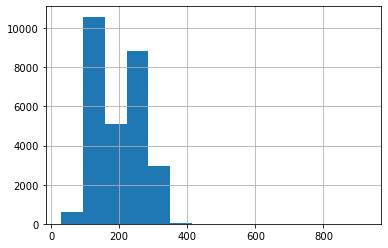

In [9]:
#Number of tweets vs length

data['len'].hist(bins=14)

In [10]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''
    return TAG_RE.sub('', text)

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [12]:
# CLEANING OF TWEETS:

# def clean_tweet(tweet):
#     '''
#     Utility function to clean the text in a tweet by removing 
#     links and special characters using regex.
#     '''
#     return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def clean_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    # Remove https and co
    sentence = re.sub('https', '', sentence)
    sentence = re.sub('co', '', sentence)
    

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [13]:
# ANALYSIS OF TWEETS:

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [14]:
from nltk.corpus import stopwords

In [23]:
# Calling preprocessing_text function on movie_reviews

X = []
sentences = list(data['tweet'])
for sen in sentences:
    X.append(clean_tweet(sen))

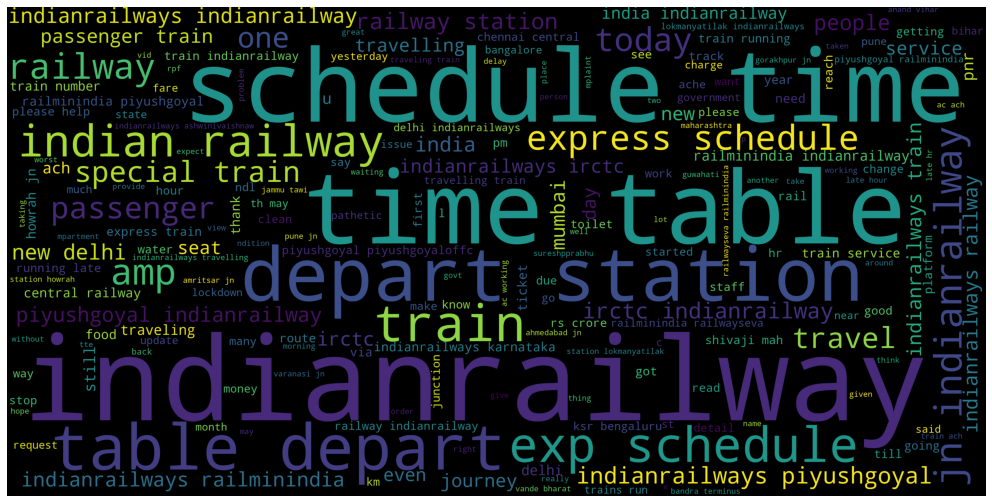

In [37]:
# WordCloud

Tweets = [x.strip('retweet') for x in data.tweet]
corpus = ' '.join(np.array([clean_tweet(tweet) for tweet in Tweets]))

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(corpus)
plt.figure(figsize=(20,9))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [15]:
# CREATED A NEW COLUMN WITH THE RESULT OF ANALYSIS:

data['SentimentAnalysis'] = np.array([analize_sentiment(tweet) for tweet in data['tweet']])


In [16]:
# DISPLAYED THE UPDATED DATAFRAME WITH NEW COLUMN :

display(data.head())

,tweet,len,id,date,source,likes,retweet,hashtags,SentimentAnalysis
0,@IRCTCofficial \nWhat is wrong with the train ...,133.0,1.629538e+18,2023-02-25 17:45:55+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,['IndianRailways'],0
1,Always Buy Railway Tickets From Railway Ticket...,122.0,1.629521e+18,2023-02-25 16:37:08+00:00,"<a href=""http://twitter.com/download/android"" ...",1.0,0.0,['IndianRailways'],0
2,#IndianRailways🙏\n\nLifeline of India🇮🇳:\n- Af...,313.0,1.629487e+18,2023-02-25 14:21:34+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",5.0,1.0,['IndianRailways'],1
3,The ETA of 12231 from LKO to Chandigarh is 10:...,298.0,1.629449e+18,2023-02-25 11:49:48+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,['IndianRailways'],-1
4,@indianrail i were filed my TDR pn 5nov 2022 f...,249.0,1.629446e+18,2023-02-25 11:37:47+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,['IndianRailways'],-1


Percentage of positive tweets: 36.125022198543775%
Percentage of neutral tweets: 45.56561889540046%
Percentage de negative tweets: 18.309358906055763%


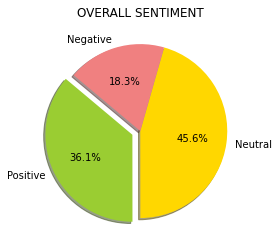

In [17]:
#OVERALL SENTIMENT

pos_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['SentimentAnalysis'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['SentimentAnalysis'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweet']) if data['SentimentAnalysis'][index] < 0]
a = len(pos_tweets)*100/len(data['tweet'])
b = len(neu_tweets)*100/len(data['tweet'])
c = len(neg_tweets)*100/len(data['tweet'])
print("Percentage of positive tweets: {}%".format(a))
print("Percentage of neutral tweets: {}%".format(b))
print("Percentage de negative tweets: {}%".format(c))

labels = 'Positive', 'Neutral', 'Negative'
colors = [ 'yellowgreen', 'gold', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# PLOT FOR OVERALL SENTIMENT:

senti = [a,b,c]
plt.figure()
plt.pie(senti, explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('OVERALL SENTIMENT')
_=plt.show()

In [18]:
neu_tweets[9]

'Financial Express: #IndianRailways achieves another milestone! Rail network in Uttar Pradesh is now fully electrified\n\nhttps://t.co/I7VBjHNxkq\n\n#NewsInTweets #NewsInTweetsIn #BreakingNews #BreakingNewsIndia #NewsInTweetsIndia #FinancialXpress'

                                                 Tweets  SA
0     I am traveling from Delhi to Mumbai by 12910-B...  -1
1     Toilet water is flushing in B1 coach train no ...  -1
2     Grateful to Indian Railways for a perfect trav...   1
3     Yesterday I travelled in #TejasExpress from Go...   0
4     #IndianRailways \nPNR-2256392120\nTrn:22902\nD...  -1
...                                                 ...  ..
1775  Overwhelming smell from the urinals. #IndianRa...   1
1776  Guys this the exclusive pic from the upper sea...   0
1777  Knowing or unknowing? The #IndianRailways deli...   1
1778  Knowing or unknowing? The #IndianRailways deli...   1
1779  Kabhi 'shaucha' na tha! ;) RT @shauchalaya Whi...   1

[1780 rows x 2 columns]
                                                Tweets  SA
0    Why not operate battery operated car on Pamban...   1
1    #Railways to launch OTP-based 'Digital Lock Sy...   0
2    "Dear @RailMinIndia and @AshwiniVaishnaw, Im t...  -1
3    Godavari Expre

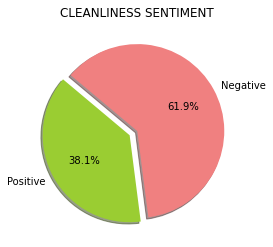

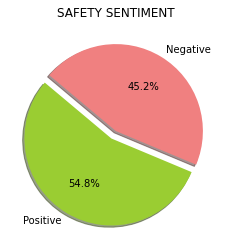

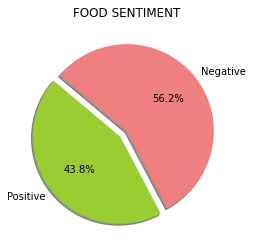

In [19]:
# FOR CLEANLINESS, SAFETY AND FOOD

cleani = ['unhygienic', 'clean', 'pure', 'dirty', 'neat', 'sanitation', 'tidy', 'fresh', 'filthy', 'foul', 'smell', 'toilet']
safie = ['safe', 'secure', 'protect', 'danger', 'hazard', 'risk', 'threat', 'fear']
foodie = ['food', 'nutrition', 'bread', 'cook', 'meal','breakfast','lunch', 'dinner','drink', 'pantry','water']


keywords = []
keywords.append(cleani)
keywords.append(safie)
keywords.append(foodie)

plot_name = ['CLEANLINESS SENTIMENT','SAFETY SENTIMENT', 'FOOD SENTIMENT']

for g in range(0,3):
    para_tweets = []
    SA = []
    for i in data['tweet']:
        for word in keywords[g]:
            if word in i:
                para_tweets.append(i)
                SA.append(analize_sentiment(i))
                parameter_df = pd.DataFrame({'Tweets': para_tweets, 'SA': SA})
    print(parameter_df)

    pos_tweets_cleanliness = [ tweet for index, tweet in enumerate(parameter_df['Tweets']) if parameter_df['SA'][index] > 0]
    neg_tweets_cleanliness = [ tweet for index, tweet in enumerate(parameter_df['Tweets']) if parameter_df['SA'][index] <= 0]
    
    d = len(pos_tweets_cleanliness)*100/len(parameter_df['Tweets'])
    f = len(neg_tweets_cleanliness)*100/len(parameter_df['Tweets'])
    # PLOT CLEANLINESS, SAFETY AND FOOD

    labels = 'Positive','Negative'
    sent = [d,f]
    plt.figure()
    plt.pie(sent, explode = (0.1,0), labels=labels, colors=('yellowgreen', 'lightcoral'),
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(plot_name[g])

In [23]:
data['tweet'][1]

'Always Buy Railway Tickets From Railway Ticket Counters/Authorized Travel Agents.  #IndianRailways https://t.co/jD7nz73sWG'

In [26]:
range(len(data))

range(0, 28155)

In [29]:
# Calling preprocessing_text function on movie_reviews

y = []
sentences = list(data['tweet'])
i=0
while i<len(data):
    for sen in sentences:
        if data['SentimentAnalysis'][i]==-1:
            y.append(clean_tweet(sen))
            i+=1

KeyboardInterrupt: 

In [31]:
data


,tweet,len,id,date,source,likes,retweet,hashtags,SentimentAnalysis
0,@IRCTCofficial \nWhat is wrong with the train ...,133.0,1.629538e+18,2023-02-25 17:45:55+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,['IndianRailways'],0
1,Always Buy Railway Tickets From Railway Ticket...,122.0,1.629521e+18,2023-02-25 16:37:08+00:00,"<a href=""http://twitter.com/download/android"" ...",1.0,0.0,['IndianRailways'],0
2,#IndianRailways🙏\n\nLifeline of India🇮🇳:\n- Af...,313.0,1.629487e+18,2023-02-25 14:21:34+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",5.0,1.0,['IndianRailways'],1
3,The ETA of 12231 from LKO to Chandigarh is 10:...,298.0,1.629449e+18,2023-02-25 11:49:48+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,['IndianRailways'],-1
4,@indianrail i were filed my TDR pn 5nov 2022 f...,249.0,1.629446e+18,2023-02-25 11:37:47+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,['IndianRailways'],-1
...,...,...,...,...,...,...,...,...,...
28150,Live updates from www.yeskerala.com about the ...,116.0,9.566100e+09,2010-02-24 07:15:26+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,0.0,"['indianrailways', 'budget']",1
28151,wooohooo....now i get to fly past FAST...http:...,134.0,8.552035e+09,2010-02-02 18:11:17+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,0.0,"['irfca', 'indianrailways']",1
28152,#IndianRailways hav a rule: Cancel d ticket if...,137.0,8.498716e+09,2010-02-01 13:44:24+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,0.0,['IndianRailways'],0
28153,@AnujaPonkshe Long shot - try calling 139 from...,137.0,8.417633e+09,2010-01-30 17:04:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,0.0,"['help', 'indianrailways']",1


In [36]:
for i in range(10):
    if data['SentimentAnalysis'][i]==-1:
        display(data['tweet'][i])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [38]:
if data['SentimentAnalysis']==-1:
    display(data['tweet'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for i in range(10):
    print(data['SentimentAnalysis'][i])